<hr>

 *PART II: Data Analysis*  

 <a id='preprocessing'></a>
# Data Preprocessing

The process of analyzing the dataset involves some Preprocessing before building the model itself. The goals in this stage are the following:

Objectives:

- Take a look at a sample of our data to get an idea of what the data in each class looks like
- Check for any class imbalance in terms of the number of images we have
- Ensure the size of the images across the three classes is consistent


### Set up

In [2]:
## IMPORT LIBRARIES ##

import numpy as np #numpy for 

import pandas as pd # pandas

from matplotlib import pyplot as plt # matplot library
import seaborn as sns

In [3]:
## IMPORT LIBRARIES ##

import os  
from matplotlib import image as mpimg
from random import randint
from PIL import Image
from skimage.io import imread, imshow
import warnings 
warnings.filterwarnings('ignore')

##########

In [4]:
## Load the image directories ##

dir = '/Users/raghadibrahim/Desktop/Olive-Tree-Disease-Detection/dataset' # paste your folder directory

# returns a list containing the names of the images in the `healthy` folder
training_healthy_data= os.listdir(dir + '/training/healthy') # training dataset
testing_healthy_data = os.listdir(dir + '/training/healthy') # testing dataset

# returns a list containing the names of the images in the `aculus olearius` folder
training_aculus_data= os.listdir(dir + '/training/aculus_olearius') # training dataset 
testing_aculus_data = os.listdir(dir + '/training/aculus_olearius') # testing dataset

# returns a list containing the names of the images in the `peacock spot` folder
training_peacock_data= os.listdir(dir + '/training/peacock_spot') # training dataset 
testing_peacock_data = os.listdir(dir + '/training/peacock_spot/') # testing dataset

#all_data = [healthy_data, aculus_olearius_data, peacock_disease_data]

In [5]:
training_dir = {
    'Healthy Leaves': os.path.join(dir, 'training/healthy'), # Path to the directory containing the Healthy Leaves dataset
    'Aculus Olearius Leaves': os.path.join(dir, 'training/aculus_olearius'), # Path to the directory containing images with Aculus Olearius Leaves
    'Peacock Spot Leaves': os.path.join(dir, 'training/peacock_spot') # Path to the directory containing images with Peacock Spot Leaves
}

testing_dir = {
    'Healthy Leaves': os.path.join(dir, 'testing/healthy'), # Path to the directory containing the Healthy Leaves dataset
    'Aculus Olearius Leaves': os.path.join(dir, 'testing/aculus_olearius'), # Path to the directory containing images with Aculus Olearius Leaves
    'Peacock Spot Leaves': os.path.join(dir, 'testing/peacock_spot') # Path to the directory containing images with Peacock Spot Leaves
}

training_data = {
    'Healthy Leaves': training_healthy_data, # Path to the directory containing the Healthy Leaves dataset
    'Aculus Olearius Leaves': training_aculus_data, # Path to the directory containing images with Aculus Olearius Leaves
    'Peacock Disease Leaves': training_peacock_data # Path to the directory containing images with Peacock Spot Leaves
}

testing_data = {
    'Healthy Leaves': testing_healthy_data, # Path to the directory containing the Healthy Leaves dataset
    'Aculus Olearius Leaves': testing_aculus_data, # Path to the directory containing images with Aculus Olearius Leaves
    'Peacock Disease Leaves': testing_peacock_data # Path to the directory containing images with Peacock Spot Leaves
}
##########

---

<a id='3.1'></a>
## A First Look At The Data

We can start off by taking a look at the data we are working with. Again, the dataset constitutes of thousands images for each of the three states of an olive leaf that we are trying to detect: a healthy leaf, a leaf infected with Aculus Olearius, and a leaf infected with Peacock Spot Disease so we expect to see three categories of leaves.

To do this, we will display a small sample of each class to get an idea of the images in that group. This can be done through generating a random sample of the images from each of the three classes, starting with the healthy leaves followed by leaves infected with Aculus olearius disease and finally leaves infected with peacock spot disease.

In [7]:
# Sanity check

training_dir, testing_dir

({'Healthy Leaves': '/Users/raghadibrahim/Desktop/Olive-Tree-Disease-Detection/dataset/training/healthy',
  'Aculus Olearius Leaves': '/Users/raghadibrahim/Desktop/Olive-Tree-Disease-Detection/dataset/training/aculus_olearius',
  'Peacock Spot Leaves': '/Users/raghadibrahim/Desktop/Olive-Tree-Disease-Detection/dataset/training/peacock_spot'},
 {'Healthy Leaves': '/Users/raghadibrahim/Desktop/Olive-Tree-Disease-Detection/dataset/testing/healthy',
  'Aculus Olearius Leaves': '/Users/raghadibrahim/Desktop/Olive-Tree-Disease-Detection/dataset/testing/aculus_olearius',
  'Peacock Spot Leaves': '/Users/raghadibrahim/Desktop/Olive-Tree-Disease-Detection/dataset/testing/peacock_spot'})

Now we can create a nested for-loop to iterate across our dataset

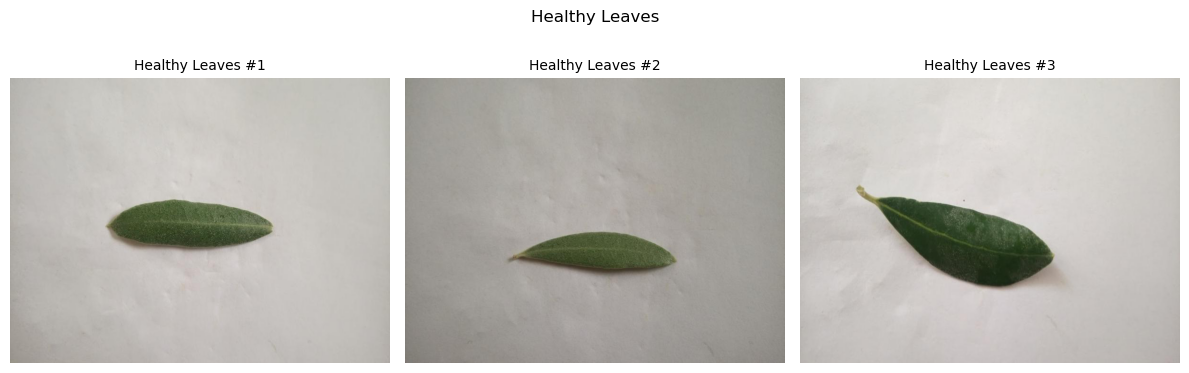

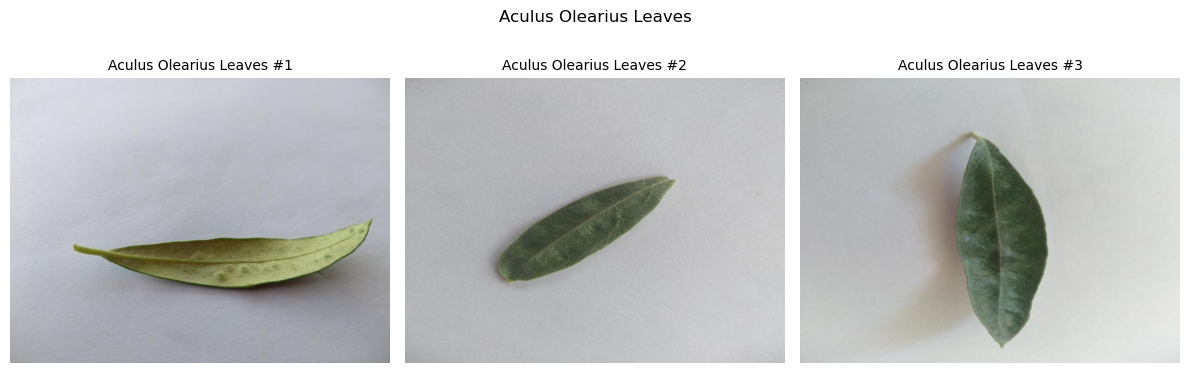

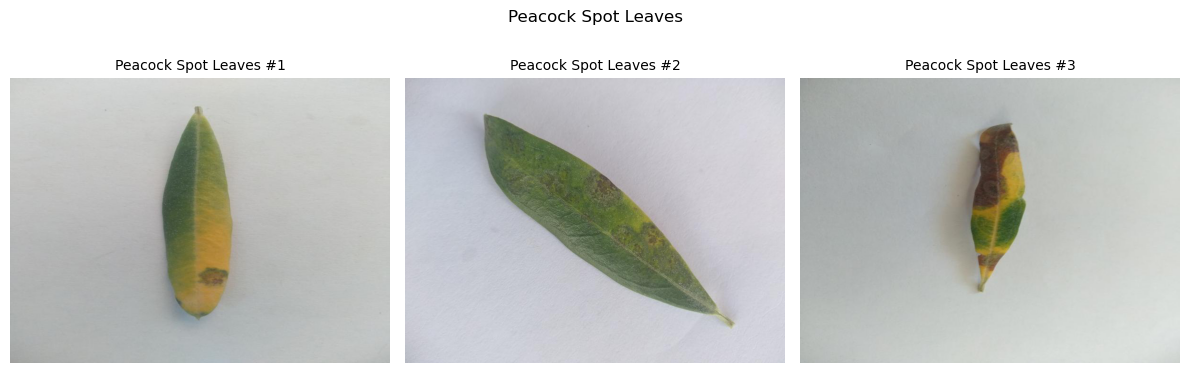

In [8]:
# STEP 2: Loop through each class to generate and plot samples

for class_name, directory in training_dir.items():
    
    all_images = os.listdir(directory) # Get all image filenames for the current class
    selected_images = np.random.choice(all_images, 3, replace=False) # Randomly select a sample of images
    
    fig, axs = plt.subplots(1, 3, figsize=(12, 4)) # Set up a subplot grid for the current class

    # Loop through the selected images to display them
    for i, image_name in enumerate(selected_images):
        
        img_path = os.path.join(directory, image_name) # Construct the path to the image file
        image = Image.open(img_path)  # Open the image

        axs[i].imshow(image) # Display the image in the subplot
        axs[i].set_title(f"{class_name} #{i+1}", fontsize=10) # Set the title for each subplot
        axs[i].axis('off') # Remove axis ticks


    # Display the plot for the current class
    plt.suptitle(class_name, fontsize=12)  # Set title for the entire plot
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Adjust layout to make room for the title
    plt.show()

####

### Obsevations:  

1. We see that the leaves display a visible difference to the human eye with healthy leaves looking, well, healthy as opposed to leaves with Aculus Olearius Infected Leaves which are visibly more wrinkly and the peacock spot leaves looking more yellowing with the distinctive spots.
2. The leaves are oriented differently across the dataset
3. The backgrounds are not consistent
4. The shadows and image lighting are not consistent

All of these are concerns that we will address in the EDA stage.

<a id='3.2'></a>
## Identifying Image Imbalance

The next step is to identify whether our dataset has any class imbalance in terms of the number of images each one has. To do this, we’re going to find the number of images assigned to each class and plot them in a bar chart to easily identify any imbalance. Imbalance could result in poor performance for the class with less representation, impacting overall performance of the models later on.


In [9]:
# Sanity check

training_dir, testing_dir

({'Healthy Leaves': '/Users/raghadibrahim/Desktop/Olive-Tree-Disease-Detection/dataset/training/healthy',
  'Aculus Olearius Leaves': '/Users/raghadibrahim/Desktop/Olive-Tree-Disease-Detection/dataset/training/aculus_olearius',
  'Peacock Spot Leaves': '/Users/raghadibrahim/Desktop/Olive-Tree-Disease-Detection/dataset/training/peacock_spot'},
 {'Healthy Leaves': '/Users/raghadibrahim/Desktop/Olive-Tree-Disease-Detection/dataset/testing/healthy',
  'Aculus Olearius Leaves': '/Users/raghadibrahim/Desktop/Olive-Tree-Disease-Detection/dataset/testing/aculus_olearius',
  'Peacock Spot Leaves': '/Users/raghadibrahim/Desktop/Olive-Tree-Disease-Detection/dataset/testing/peacock_spot'})

We can start off with plotting the number of images in each class for the training dataset.

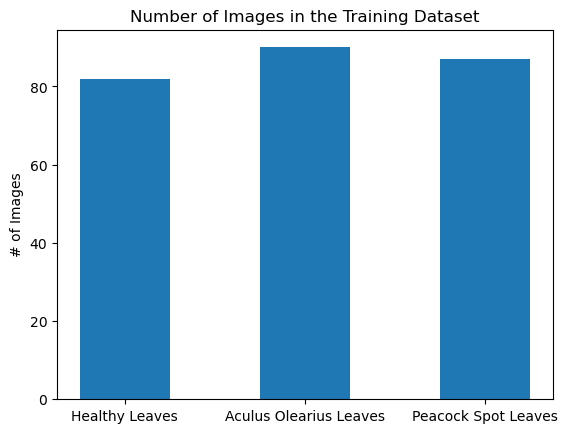

In [6]:
# Find the number of images in each class

training_leng = [len(training_dir['Healthy Leaves']), len(training_dir['Aculus Olearius Leaves']), len(training_dir['Peacock Spot Leaves'])]


## Plot the number of images for each class using a bar chart

plt.bar(training_dir.keys(), training_leng , width = .5)  # (x,y) = (class name, mumber of images)
plt.title("Number of Images in the Training Dataset")  # Title of the plot
plt.ylabel('# of Images')  # Label for the y-axis
plt.show()  # Displays the plot

####

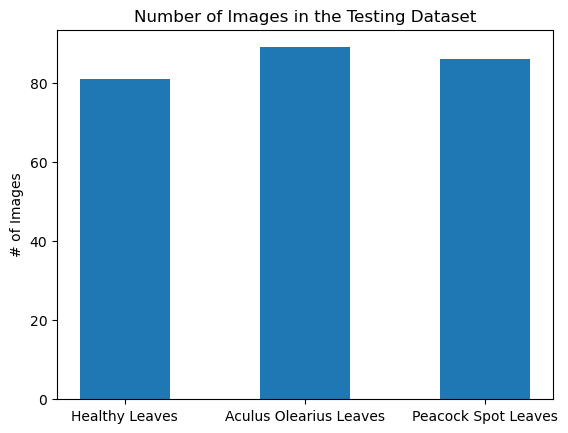

In [7]:
# Find the number of images in each class

testing_leng = [len(testing_dir['Healthy Leaves']), len(testing_dir['Aculus Olearius Leaves']), len(testing_dir['Peacock Spot Leaves'])]


## STEP 3: Plot the number of images for each class using a bar chart ##

plt.bar(testing_dir.keys(), testing_leng , width = .5)  # (x,y) = (class name, mumber of images)
plt.title("Number of Images in the Testing Dataset")  # Title of the plot
plt.ylabel('# of Images')  # Label for the y-axis
plt.show()  # Displays the plot

### Observations: 

- We have a clear imbalance in the dataset with significantly more images in Class 2 followed by Class 0 and then Class 1 which falls slighly below Class 0. This could affect the training phase of the predictive models considering we do not have as much data to train for the second classc to train it on. 

In [13]:
# Creating a DataFrame from the counts
df_counts = pd.DataFrame([training_leng, testing_leng], index=['Training', 'Testing'])

df_counts

,0,1,2
Training,82,90,87
Testing,81,89,86


---

<a id='3.3'></a>
## Plotting Image Size

It is important that we maintain a consistent image size throughout the different classes in our dataset to avoid mismatched matrices when we start modeling. We can visualize the raw image size in each class using a scatter plot as seen below. 






In [19]:
training_dir, testing_dir

({'Healthy Leaves': 'dataset/training/healthy',
  'Aculus Olearius Leaves': 'dataset/training/aculus_olearius',
  'Peacock Spot Leaves': 'dataset/training/peacock_spot'},
 {'Healthy Leaves': 'dataset/testing/healthy',
  'Aculus Olearius Leaves': 'dataset/testing/aculus_olearius',
  'Peacock Spot Leaves': 'dataset/testing/peacock_spot'})

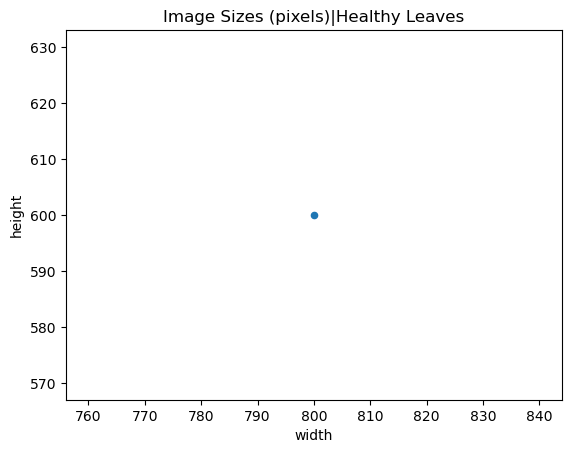

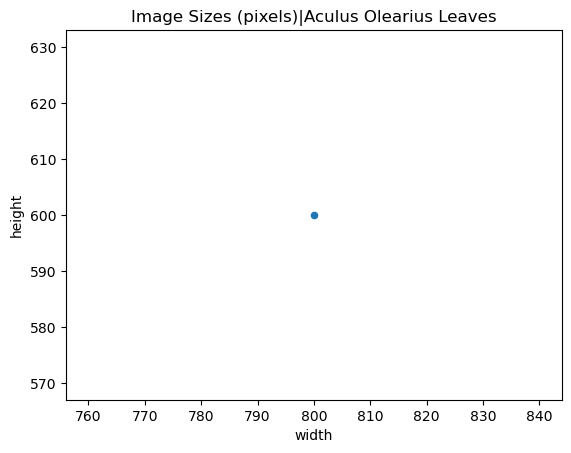

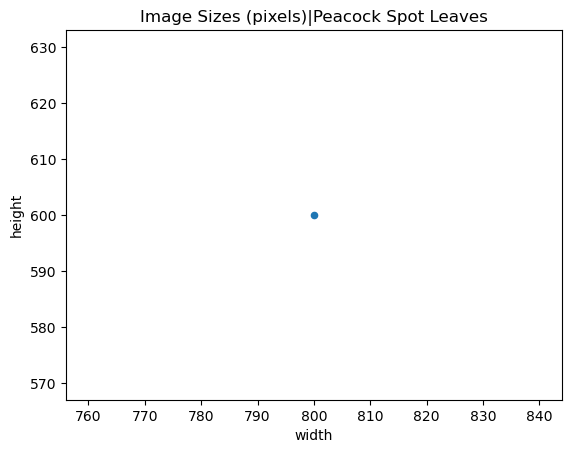

In [14]:
for name, directory in training_dir.items():
    
    # List all files in the current directory
    filelist = [os.path.join(directory, f) for f in os.listdir(directory)] 
    
    # Initialize lists to store the heights and widths of images
    heights = [] # list to store the height of each image
    widths = [] # list to store the width of each image

    
## STEP 3: Loop over each file in the directory ##
   
    for file in filelist:
        
        try:
            img = mpimg.imread(file) # Attempt to read the image file
        except:
            continue # If reading the image fails, skip to the next file
            
        # Extract the height and width of the current image     
        h = img.shape[0] # image height
        w = img.shape[1] # image width

        # Append the image's dimensions to the respective lists
        heights.append(h)
        widths.append(w)

## STEP 4:
    
    # Create a DataFrame from the collected image dimensions
    dim_df = pd.DataFrame({'height': heights, 'width': widths})
    
    # Group the dimensions to count the occurrence of each size combination    
    sizes = dim_df.groupby(['height', 'width']).size().reset_index().rename(columns={0: 'count'})
    
    # Plot
    sizes.plot.scatter(x='width', y='height',) # scatter plot where x-axis represents width and y-axis is height
    plt.title(f'Image Sizes (pixels)|{name}') # set the title of the plot to indicate the class of images being plotted
    plt.show()  # display plot for each class

####

### Obsevations:  

We can see above displayed by the single point in each plot that all our images in the three classes are in fact the same size: $600*800$ pixels. This means that every image has a height made up of $600$ pixels and a width of $800$ pixels.   <br>